# Tutorial 2: Feature importance, and some scatter plots (GS)

---

The aim of this notebook, is to reorder the 2074 columns according to their importance

First, let us recall the data from the previous notebook

In [1]:
%store -r df_input_GD
%store -r y_GD
%store -r df_GD


<b><i> Data splitting </i></b> 

In [2]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( df_input_GD, y_GD, test_size = 0.3, random_state=3, stratify=y_GD) # train and valid sets

In [3]:
print(Xtrain.shape)
print(Xtest.shape)

(382, 2074)
(165, 2074)


---

<b><i> Permutation Importance </i></b> 

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from random import *
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
featImp_GD = [] # an empty list to store the important features

In [7]:
for i in range (1000): # we will take the average of 1000 permutations, with different sizes and random splits (you can increase the number for it to be more robust)
    print("itr: " + str(i))
    
    RandomStateValid = randrange(50)
    ranodmSplitValid = random.uniform(0.2, 0.5)
    XtrainPer, XvalidPer, YtrainPer, YvalidPer = train_test_split( np.array(Xtrain), np.array(Ytrain), test_size = ranodmSplitValid, random_state=RandomStateValid, stratify=Ytrain) # train and valid sets
    print("Train shape: "+str(XtrainPer.shape))
    print("Valid shape: "+str(XvalidPer.shape))
    print()
   
    # train
    model = RandomForestClassifier(n_estimators=50, random_state=0, n_jobs = -1)
    model.fit(XtrainPer, YtrainPer)
    
    results = permutation_importance(model, XvalidPer, YvalidPer, scoring='precision_macro', n_repeats = 10, n_jobs = -1)
    importance = results.importances_mean
    # print(importance)

    featImp_GD.append(importance)

In [14]:
# %store featImp_GD

Stored 'featImp_GD' (list)


In [8]:
%store -r featImp_GD


In [9]:
np.array(featImp_GD).shape

(1000, 2074)

---

<b><i>Importance Graph </i></b> 

In [10]:
arrimp = np.array(featImp_GD).mean(0)
sorted_idx = arrimp.argsort()
print(sorted_idx[-15:])

[ 202  106 2045   33   17   15  205  144  153   71  180  157   60   43
   86]


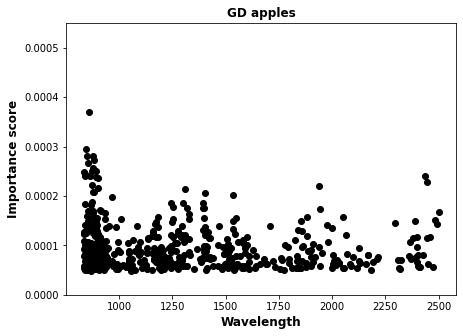

In [16]:
n = 500
rand  = np.random.randint(len(y_GD), size= n)

plt.rcParams["figure.figsize"] = (7,5)# 'xtick.labelsize', 'ytick.labelsize'
plt.scatter(df_input_GD.columns[sorted_idx][-n:], arrimp[sorted_idx][-n:], color = 'black')

plt.title("GD apples", fontweight ='bold', fontsize =12)    
plt.xlabel("Wavelength", fontweight ='bold', fontsize =12)
plt.ylabel("Importance score", fontweight ='bold', fontsize =12)
plt.ylim([0, .00055])
plt.show()

---